In [1]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns

In [2]:
#import federal files to be used for analysis

federal_files = [r"C:\Users\Stephen Adomako\OneDrive\Desktop\Capstone Project\Real estate data\Random Forest for real estate\Mortgage Interest Rate.csv", 
             r"C:\Users\Stephen Adomako\OneDrive\Desktop\Capstone Project\Real estate data\Random Forest for real estate\Rental Vacancy Rate.csv", 
             r"C:\Users\Stephen Adomako\OneDrive\Desktop\Capstone Project\Real estate data\Random Forest for real estate\Consumer Price index.csv"]

combined_federal_files = [pd.read_csv(federal_file, parse_dates=True, index_col=0) for federal_file in federal_files]

In [3]:
#combine the federal data
federal_data = pd.concat(combined_federal_files, axis=1)
federal_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-09-15,6.02,NaN,NaN
2022-09-22,6.29,NaN,NaN
2022-09-29,6.70,NaN,NaN


In [4]:
#fill NAs with current data
federal_data = federal_data.ffill().dropna()

federal_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2022-09-15,6.02,5.6,296.761
2022-09-22,6.29,5.6,296.761
2022-09-29,6.70,5.6,296.761


In [5]:
#import zillow files(median sales house Price and Home value index)

zillow_files = [r"C:\Users\Stephen Adomako\OneDrive\Desktop\Capstone Project\Real estate data\Random Forest for real estate\Metro_median_sale_price_uc_sfrcondo_week.csv", 
                r"C:\Users\Stephen Adomako\OneDrive\Desktop\Capstone Project\Real estate data\Random Forest for real estate\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

zillow_combined_files= [pd.read_csv(zillow_file) for zillow_file in zillow_files]

In [6]:
#Get columns for Minnesota only
zillow_combined_files[0] = zillow_combined_files[0].loc[zillow_combined_files[0]['StateName'] == "MN"]
zillow_combined_files[0]
zillow_combined_files[1] = zillow_combined_files[1].loc[zillow_combined_files[1]['StateName'] == "MN"]
zillow_combined_files[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
16,394865,16,"Minneapolis, MN",msa,MN,119934.730950,118761.916982,118451.353606,118627.530889,119172.433003,...,357519.135958,360177.478025,366569.444151,373251.789928,377217.578338,380135.564791,379867.746821,375914.088702,372300.457807,371712.013603
170,394543,171,"Duluth, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,213845.828535,215404.861266,216146.741026,220973.795717,227102.010657,232063.000320,232905.685216,233590.869139,234751.306671,234108.659095
204,395030,205,"Rochester, MN",msa,MN,100481.305096,100728.152852,101996.692684,101942.328960,101771.462424,...,296847.148051,299520.536920,303921.952735,306834.228953,310261.967559,310432.702737,311315.557547,312095.728344,311981.878384,311167.027023
225,395118,226,"St. Cloud, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,276148.756303,278091.304588,279591.933391,289702.027355,290788.111119,293006.964112,300119.321382,298133.313780,295874.529511,294239.687445
377,394823,378,"Mankato, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,263493.766523,267443.173274,266683.518154,270993.063419,272996.717242,277111.606555,283376.248420,286435.233629,288412.155212,288349.357688
384,394637,385,"Grand Forks, ND",msa,MN,NaN,NaN,NaN,NaN,NaN,...,242964.379780,246594.865615,246686.356878,247937.544936,251319.341200,255062.021335,257748.483080,258159.488855,259657.457158,260715.157823
403,394410,404,"Brainerd, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,278503.031415,283844.049279,285775.321407,295042.338673,297094.526072,304432.784063,309892.009126,310829.389604,313011.861293,302105.060972
488,394586,490,"Faribault, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,318111.090209,317651.009448,317717.285821,324218.817692,318201.853438,325817.210173,321411.085683,322184.880542,327613.158110,323858.532934
526,394591,530,"Fergus Falls, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,318361.252924,318815.528158,315019.829457,316331.516975,317639.763324,319734.077340,326729.687230,328299.654266,330818.113826,332892.801183
586,395234,591,"Winona, MN",msa,MN,NaN,NaN,NaN,NaN,NaN,...,218898.884583,218683.991568,220610.174917,223341.015803,227039.661326,229009.516927,230933.963474,232539.274636,233501.744969,236366.947519


In [7]:
#Get only the date and Home Price column for preprocessing
zillow_combined_files = [pd.DataFrame(new_data.iloc[0,5:]) for new_data in zillow_combined_files]
for new_data in zillow_combined_files:
    new_data.index = pd.to_datetime(new_data.index)
    new_data["month"] = new_data.index.to_period("M")

In [8]:
zillow_combined_files[0].tail()

,14,month
2022-08-06,365000.0,2022-08
2022-08-13,361250.0,2022-08
2022-08-20,355000.0,2022-08
2022-08-27,350000.0,2022-08
2022-09-03,356500.0,2022-09


In [9]:
home_price = zillow_combined_files[0].merge(zillow_combined_files[1], on="month")

In [10]:
home_price.index = zillow_combined_files[0].index

In [11]:
home_price

,14,month,16
2008-02-02,215000.0,2008-02,243109.38116
2008-02-09,204250.0,2008-02,243109.38116
2008-02-16,215000.0,2008-02,243109.38116
2008-02-23,200000.0,2008-02,243109.38116
2008-03-01,215000.0,2008-03,240739.088643
...,...,...,...
2022-08-06,365000.0,2022-08,372300.457807
2022-08-13,361250.0,2022-08,372300.457807
2022-08-20,355000.0,2022-08,372300.457807
2022-08-27,350000.0,2022-08,372300.457807


In [12]:
#Delete the month column
del home_price["month"]
home_price.columns = ["Median Home Sale Price", "Home Value index"]

In [13]:
home_price.head()

,Median Home Sale Price,Home Value index
2008-02-02,215000.0,243109.38116
2008-02-09,204250.0,243109.38116
2008-02-16,215000.0,243109.38116
2008-02-23,200000.0,243109.38116
2008-03-01,215000.0,240739.088643


In [14]:
#drop nas from federal data

federal_data = federal_data.dropna()
federal_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2022-09-15,6.02,5.6,296.761
2022-09-22,6.29,5.6,296.761
2022-09-29,6.70,5.6,296.761


In [15]:
#from datetime import timedelta

federal_data.index = federal_data.index + timedelta(days=2)

In [16]:
federal_data.tail(10)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-08-13,5.22,5.6,295.620
2022-08-20,5.13,5.6,295.620
2022-08-27,5.55,5.6,295.620
2022-09-03,5.66,5.6,296.761
2022-09-10,5.89,5.6,296.761
2022-09-17,6.02,5.6,296.761
2022-09-24,6.29,5.6,296.761
2022-10-01,6.70,5.6,296.761
2022-10-08,6.66,5.6,296.761


In [17]:
home_price = federal_data.merge(home_price, left_index=True, right_index=True)

In [18]:
home_price.tail()

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,Median Home Sale Price,Home Value index
2022-08-06,4.99,5.6,295.620,365000.0,372300.457807
2022-08-13,5.22,5.6,295.620,361250.0,372300.457807
2022-08-20,5.13,5.6,295.620,355000.0,372300.457807
2022-08-27,5.55,5.6,295.620,350000.0,372300.457807
2022-09-03,5.66,5.6,296.761,356500.0,371712.013603


In [19]:
home_price.columns = ["mortgage rate", "rental vacancy rate", "consumer price index", "Median Home Sale Price", "Home Value Index"]

In [20]:
home_price.tail()

,mortgage rate,rental vacancy rate,consumer price index,Median Home Sale Price,Home Value Index
2022-08-06,4.99,5.6,295.620,365000.0,372300.457807
2022-08-13,5.22,5.6,295.620,361250.0,372300.457807
2022-08-20,5.13,5.6,295.620,355000.0,372300.457807
2022-08-27,5.55,5.6,295.620,350000.0,372300.457807
2022-09-03,5.66,5.6,296.761,356500.0,371712.013603


In [21]:
#GET CORRELATION AMONG VARIABLES
home_price.dtypes

mortgage rate             float64
rental vacancy rate       float64
consumer price index      float64
Median Home Sale Price     object
Home Value Index           object
dtype: object

In [22]:
#convert price and value column to a float
home_price["Median Home Sale Price"] = home_price["Median Home Sale Price"].astype("float")
home_price["Home Value Index"] = home_price["Home Value Index"].astype("float")

In [23]:
home_price.dtypes

mortgage rate             float64
rental vacancy rate       float64
consumer price index      float64
Median Home Sale Price    float64
Home Value Index          float64
dtype: object

In [24]:
#Apply correlation using Pearson coefficient to identify thier coefficients
home_price.corr()

,mortgage rate,rental vacancy rate,consumer price index,Median Home Sale Price,Home Value Index
mortgage rate,1.000000,0.606610,-0.468813,-0.301097,-0.275457
rental vacancy rate,0.606610,1.000000,-0.892694,-0.770299,-0.759729
consumer price index,-0.468813,-0.892694,1.000000,0.908512,0.911246
Median Home Sale Price,-0.301097,-0.770299,0.908512,1.000000,0.984511
Home Value Index,-0.275457,-0.759729,0.911246,0.984511,1.000000


In [25]:
#Print output for each of the variables
print('Mortgage rate :',home_price['Median Home Sale Price'].corr(home_price['mortgage rate']))
print('Rental Vacancy Rate :',home_price['Median Home Sale Price'].corr(home_price['rental vacancy rate']))
print('Consumer Price Index :',home_price['Median Home Sale Price'].corr(home_price['consumer price index']))
print('Home Value Index  :',home_price['Median Home Sale Price'].corr(home_price['Home Value Index']))

Mortgage rate : -0.3010973840141367
Rental Vacancy Rate : -0.7702994295212147
Consumer Price Index : 0.9085124448579996
Home Value Index  : 0.9845105628820615


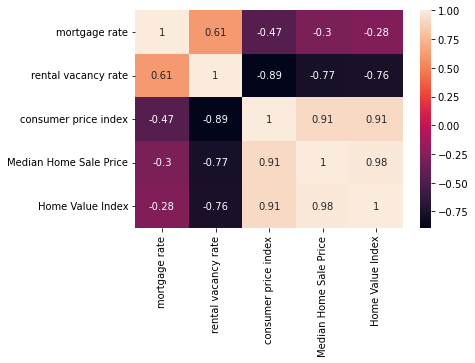

In [26]:
#plotting the heatmap for correlation
ax = sns.heatmap(home_price.corr(), annot=True)

In [27]:
#eliminate the inflation from the Home price and Home value index since we don't want to predict inflation


home_price["Adjusted Median Home Sale Price"] = home_price["Median Home Sale Price"] / home_price["consumer price index"] * 100
home_price["Adjusted Median Home Value Index"] = home_price["Home Value Index"] / home_price["consumer price index"] * 100

<AxesSubplot:>

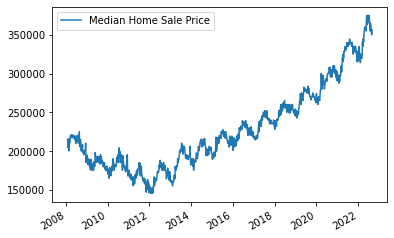

In [28]:
home_price.plot.line(y="Median Home Sale Price", use_index=True)

<AxesSubplot:>

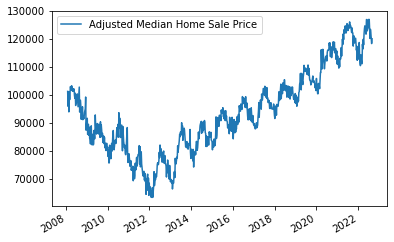

In [29]:
home_price.plot.line(y="Adjusted Median Home Sale Price", use_index=True)

In [30]:
#rename the index
home_price.index.names = ['Date']
home_price

,mortgage rate,rental vacancy rate,consumer price index,Median Home Sale Price,Home Value Index,Adjusted Median Home Sale Price,Adjusted Median Home Value Index
Date,,,,,,,
2008-02-02,5.68,10.1,212.174,215000.0,243109.381160,101331.925684,114580.194161
2008-02-09,5.67,10.1,212.687,204250.0,243109.381160,96033.137897,114303.827295
2008-02-16,5.72,10.1,212.687,215000.0,243109.381160,101087.513576,114303.827295
2008-02-23,6.04,10.1,212.687,200000.0,243109.381160,94034.896350,114303.827295
2008-03-01,6.24,10.1,212.687,215000.0,240739.088643,101087.513576,113189.376240
...,...,...,...,...,...,...,...
2022-08-06,4.99,5.6,295.620,365000.0,372300.457807,123469.318720,125938.859958
2022-08-13,5.22,5.6,295.620,361250.0,372300.457807,122200.798322,125938.859958
2022-08-20,5.13,5.6,295.620,355000.0,372300.457807,120086.597659,125938.859958


In [31]:
#price_data = pd.read_csv(r'C:\Users\Stephen Adomako\OneDrive\Desktop\Capstone Project\Real estate data\Random Forest for real estate\price_data.csv')
#price_data.head()